In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json  ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
import kaggle
import zipfile
import os

In [ ]:
!kaggle datasets download -d ayuraj/asl-dataset

 83% 47.0M/56.9M [00:00<00:00, 136MB/s] 
100% 56.9M/56.9M [00:00<00:00, 103MB/s]


In [ ]:
from zipfile import ZipFile
dataset = '/content/asl-dataset.zip'
with ZipFile(dataset , 'r') as zip :
  zip.extractall()
  print('file is extracted')


file is extracted


In [ ]:


import cv2
!pip install mediapipe
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.3)

DATA_DIR = '/content/asl_dataset'


In [ ]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)

        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
path = '/content/asl_dataset'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(128,128))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

data = np.array(data)
label = np.array(label)

In [ ]:
x_train, x_test0, y_train, y_test0 = train_test_split(data, label, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test0, y_test0, test_size=0.5)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(4024, 128, 128, 3)
(4024,)
(503, 128, 128, 3)
(503,)
(503, 128, 128, 3)
(503,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

print('{}% of samples were classified correctly !'.format(score * 100))


ValueError: ignored

In [ ]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0
#Encode labels from string to int
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_test = le.fit_transform(y_test)
labelEnc_val = le.fit_transform(y_val)

In [ ]:
print(x_val.shape)
print(labelEnc_val.shape)

(503, 128, 128, 3)
(503,)


In [ ]:
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D

In [ ]:
num_classes = 36

model = keras.Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (128,128,3)))
model.add(AveragePooling2D())

model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 average_pooling2d (AverageP  (None, 62, 62, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 29, 29, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 128)               6

In [ ]:
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# Training the Neural Network
history = model.fit(x_train, labelEnc_train, validation_data=(x_val,labelEnc_val), epochs=8, batch_size=32)

Epoch 1/8
126/126 [==============================] - 211s 2s/step - loss: 0.6730 - acc: 0.8084 - val_loss: 0.1573 - val_acc: 0.9543
Epoch 2/8
126/126 [==============================] - 205s 2s/step - loss: 0.0738 - acc: 0.9754 - val_loss: 0.1059 - val_acc: 0.9781
Epoch 3/8
126/126 [==============================] - 211s 2s/step - loss: 0.0269 - acc: 0.9938 - val_loss: 0.0612 - val_acc: 0.9920
Epoch 4/8
126/126 [==============================] - 214s 2s/step - loss: 0.0177 - acc: 0.9935 - val_loss: 0.0430 - val_acc: 0.9940
Epoch 5/8
126/126 [==============================] - 209s 2s/step - loss: 0.0035 - acc: 0.9993 - val_loss: 0.0693 - val_acc: 0.9901
Epoch 6/8
126/126 [==============================] - 205s 2s/step - loss: 1.7919e-04 - acc: 1.0000 - val_loss: 0.0672 - val_acc: 0.9901
Epoch 7/8
126/126 [==============================] - 207s 2s/step - loss: 6.1662e-05 - acc: 1.0000 - val_loss: 0.0721 - val_acc: 0.9901
Epoch 8/8
126/126 [==============================] - 207s 2s/step - 

In [ ]:
loss, accuracy = model.evaluate(x_test, labelEnc_test)
print('Test Accuracy =', accuracy)


16/16 [==============================] - 13s 795ms/step - loss: 0.0835 - acc: 0.9861
Test Accuracy = 0.9860835075378418


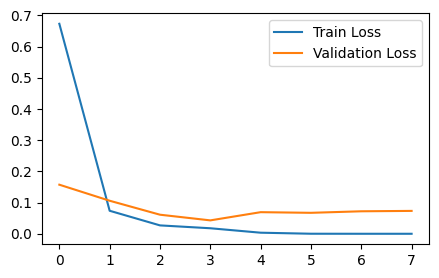

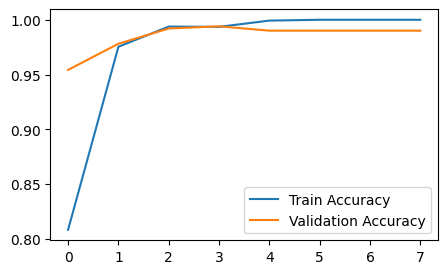

In [ ]:
# Plot the loss value
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save("model.h5")

In [ ]:
mod = tf.keras.models.load_model('model.h5')

In [ ]:
aymen = []
img = cv2.imread('/content/hand1_x_bot_seg_1_cropped.jpeg')
img = cv2.resize(img,(128,128))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
aymen.append(img)
aymen = np.array(aymen)
aymen = aymen/255.0


In [ ]:
y = model.predict(aymen)
y =np.argmax(y , axis=1)
y


1/1 [==============================] - 0s 66ms/step


array([33])

InvalidArgumentError: ignored